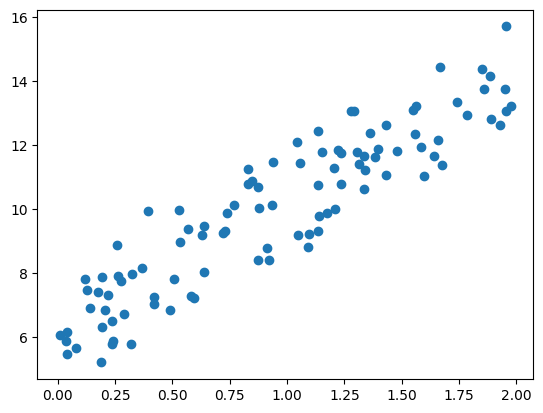

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

np.random.seed(0)

X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [30]:

def get_weight_updates (w1, w0, X, y, learning_rate=0.01 ):
    N = len(y)
    #먼저 w1_update, w0_update를 각각 wl, wo의 shape와 동일한 크기를 가진 0 값으로 초기화
    wl_update = np. zeros_like(w1)
    w0_update = np. zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot (X, w1.T) + w0
    diff = y-y_pred

    
    
    #wo_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))
    #w1과 WO을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate* (np.dot (X.T, diff))
    w0_update = -(2/N) * learning_rate* (np.dot (w0_factors.T, diff))
   
    return w1_update, w0_update , diff

In [6]:
#wO와 w1을 모두 0으로 초기화.
w0= np.zeros((1,1))
w1 = np.zeros((1,1))
N = len(y)
get_weight_updates(w1, w0, X, y, learning_rate=0.01)

(array([[-0.21502681]]), array([[-0.1994937]]))

In [35]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 WO를 업데이트 적용함. 
def gradient_descent_steps (X, y, iters=10000):
    epoch=0
    #wO와 w1을 모두 0으로 초기화.
    w0= np.zeros((1,1))
    w1 = np.zeros((1,1))
    N = len(y)
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 wl, wo 업데이트 수행.
    for ind in range (iters):
        w1_update, w0_update ,diff  = get_weight_updates (w1, w0, X, y, learning_rate=0.01)
        w1= w1 - w1_update
        w0= w0 - w0_update
        epoch  += 1
        if epoch % 100 == 0:
            
            mse = np.sum(np.square (diff))/N #오차값
            print(f'epoch : {epoch} 일때 mse : {mse} , w1 : {w1} , w0 : {w0}')
    return w1, w0

In [36]:
gradient_descent_steps(X, y, iters=10000)

epoch : 100 일때 mse : 1.363862615932478 , w1 : [[4.86163102]] , w0 : [[5.0582361]]
epoch : 200 일때 mse : 1.1744846705417324 , w1 : [[4.67090177]] , w0 : [[5.42820914]]
epoch : 300 일때 mse : 1.0879632803834909 , w1 : [[4.47812056]] , w0 : [[5.64774987]]
epoch : 400 일때 mse : 1.042564550249074 , w1 : [[4.3376679]] , w0 : [[5.8060703]]
epoch : 500 일때 mse : 1.0187418753394266 , w1 : [[4.23591336]] , w0 : [[5.92074581]]
epoch : 600 일때 mse : 1.0062410883678472 , w1 : [[4.16220304]] , w0 : [[6.00381563]]
epoch : 700 일때 mse : 0.999681385248734 , w1 : [[4.1088079]] , w0 : [[6.06399071]]
epoch : 800 일때 mse : 0.9962392255584092 , w1 : [[4.07012892]] , w0 : [[6.10758103]]
epoch : 900 일때 mse : 0.9944329756232296 , w1 : [[4.04211018]] , w0 : [[6.1391575]]
epoch : 1000 일때 mse : 0.9934851582289619 , w1 : [[4.02181364]] , w0 : [[6.16203122]]
epoch : 1100 일때 mse : 0.9929877974842611 , w1 : [[4.007111]] , w0 : [[6.17860076]]
epoch : 1200 일때 mse : 0.9927268108091218 , w1 : [[3.99646053]] , w0 : [[6.19060359]]

(array([[3.96846751]]), array([[6.22215108]]))